## About Dataset

### Content

Dataset is organized into 2 folders (train, test) and both train and test contain 3 subfolders (COVID19, PNEUMONIA, NORMAL). DataSet contains total 6432 x-ray images and test data have 20% of total images.

#### Acknowledgements

Images are collected from various publicly available resources. If you use the data for research please give credit to authors:

Sources:

https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia

https://github.com/ieee8023/covid-chestxray-dataset

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

https://github.com/agchung

#### Inspiration

Application of Artificial Intelligence (AI) techniques with radiological images for COVID-19 diagnosis.

### Importing libraries that are required to build this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
import time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### Task 1: Retrieving and Preparing the Data

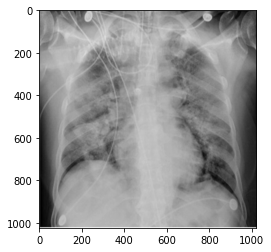

In [2]:
DATADIR_TRAIN =  './train/'
CATEGORIES = ['COVID19', 'NORMAL', 'PNEUMONIA']

for category in CATEGORIES:
    path = os.path.join(DATADIR_TRAIN, category) # path to covid19, normal and pneummonia directory of training dataset
    for img in os.listdir(path):
        # creating a image array by combinig the all three category of training dataset
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        # ploting a data from training dataset
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

#### Training Dataset

In [3]:
training_data = []
IMG_SIZE = 227

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR_TRAIN, category) # path to covid19, normal and pneummonia dir
        class_num = CATEGORIES.index(category) # assigning index as thier labels 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])# appending the training data and their labels in training_data variable                
            except Exception as e:
                pass

create_training_data()

In [4]:
# shuffling the training and testing dataset
import random 
random.shuffle(training_data)

In [5]:
X  = []
y = []
# Extracting features and labels from tyraining dataset
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, 227, 227, 1)
y =  np.array(y)

In [6]:
X = X/255.0

#### Test Dataset

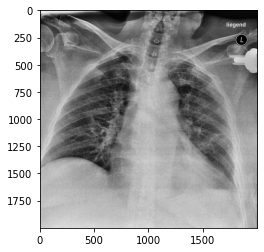

In [7]:
DATADIR_TRAIN =  './test/'
CATEGORIES = ['COVID19', 'NORMAL', 'PNEUMONIA']

for category in CATEGORIES:
    path = os.path.join(DATADIR_TRAIN, category) # path to covid19, normal and pneummonia directory of training dataset
    for img in os.listdir(path):
        # creating a image array by combinig the all three category of training dataset
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        # ploting a data from training dataset
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

In [8]:
testing_data = []
IMG_SIZE = 227

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR_TRAIN, category) # path to covid19, normal and pneummonia dir
        class_num = CATEGORIES.index(category) # assigning index as thier labels 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_array, class_num])# appending the training data and their labels in training_data variable                
            except Exception as e:
                pass

create_testing_data()

In [9]:
random.shuffle(testing_data)

In [10]:
X_test  = []
y_test = []
for features, label in training_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1, 227, 227, 1)
y_test =  np.array(y_test)

In [11]:
X_test = X_test/255.0

## Task 2: Model Implementation

### Implementation of the AlexNet using Keras Sequential API

In [12]:
model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape= X.shape[1:]),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

### Model compilation and summary

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

/Users/rahul/miniforge3/envs/env_tf/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Training and Results

In [14]:
epoch = 20
history= model.fit (X, y , batch_size = 32,epochs=epoch, validation_split = 0.2)

Epoch 1/20
129/129 [==============================] - 28s 211ms/step - loss: 0.7331 - accuracy: 0.8012 - val_loss: 1.8399 - val_accuracy: 0.4509
Epoch 2/20
129/129 [==============================] - 18s 142ms/step - loss: 0.3470 - accuracy: 0.8923 - val_loss: 1.3400 - val_accuracy: 0.6832
Epoch 3/20
129/129 [==============================] - 18s 140ms/step - loss: 0.2785 - accuracy: 0.9081 - val_loss: 0.9883 - val_accuracy: 0.6861
Epoch 4/20
129/129 [==============================] - 18s 140ms/step - loss: 0.2406 - accuracy: 0.9186 - val_loss: 0.1937 - val_accuracy: 0.9184
Epoch 5/20
129/129 [==============================] - 19s 144ms/step - loss: 0.2319 - accuracy: 0.9222 - val_loss: 0.1537 - val_accuracy: 0.9427
Epoch 6/20
129/129 [==============================] - 18s 142ms/step - loss: 0.2124 - accuracy: 0.9273 - val_loss: 0.1220 - val_accuracy: 0.9582
Epoch 7/20
129/129 [==============================] - 18s 141ms/step - loss: 0.1823 - accuracy: 0.9388 - val_loss: 0.1849 - val_ac

### Model Accuracy and model loss plot

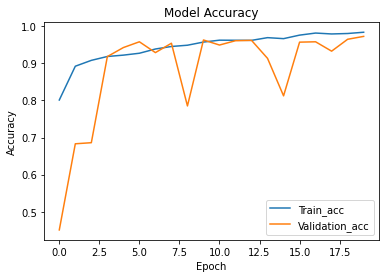

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

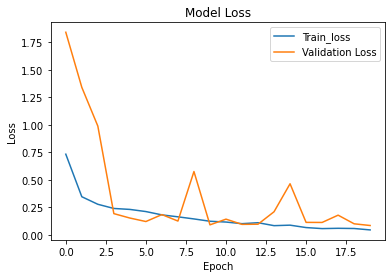

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

## Task 3: Model Evaluation

In [17]:
preds = model.evaluate(X_test, y_test)
print ("Evaluation Loss = " + str(preds[0]))
print ("Evaluation Accuracy = " + str(preds[1]))

161/161 [==============================] - 6s 35ms/step - loss: 0.0429 - accuracy: 0.9868
Evaluation Loss = 0.04291243851184845
Evaluation Accuracy = 0.9867807030677795
